In [301]:
import os
import cv2
import keras
from pickle import load,dump
from PIL import Image
from skimage import exposure
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.preprocessing import image
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,Dense
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
#for inline graphical plotting

In [320]:
path = "./UJTDchar/"
files = os.listdir(path)
character_list = os.listdir(path)
char_to_index = {}
char_big_img = {}
char_small_img = {}
char_ab_threshold = []
num_classes = 124
print(len(character_list))
print(files)
for i in character_list:
    char_small_img[i] = 0  ##no of small images for each character
    char_big_img[i] = 0    ##no of large images for each character
#print(char_big_img)
x = []
threshold = 40
small_images = 0
avg_height = 0 
avg_width = 0 
valid_images = [".jpg",".gif",".png",".tga"]
dim = (32,32)

124
['ஞ', 'ெ', 'சீ', 'றீ', 'ங', 'ள்', 'ை', 'டு', 'தூ', 'ண்', 'U', 'ல', 'ே', 'று', 'யீ', 'லூ', 'லு', 'ரீ', 'னீ', 'நூ', 'ஙி', 'ற', 'ட்', 'பு', 'கீ', 'டீ', 'றி', 'ஞீ', 'ஙீ', 'லீ', 'ட', 'மூ', 'னி', 'னு', 'ஞி', 'ழூ', 'தி', 'யூ', 'I', 'பீ', 'ணீ', 'ற்', 'ணூ', 'டூ', 'ல்', 'லி', 'சூ', 'கு', 'ர', 'ணு', 'க', 'ந்', 'க்', 'Aa', 'றூ', 'ம', 'ம்', 'ஞூ', 'மி', 'வ', 'பூ', 'வி', 'சி', 'ஒ', 'ளூ', 'நி', 'கி', 'எ', 'ன', 'ஏ', 'மீ', 'ழி', 'தீ', 'ஙு', 'ரி', 'வீ', 'ரு', 'ர்', 'நீ', 'ழ்', 'ழ', 'ளி', 'கூ', 'ன்', 'நு', 'ங்', 'ளு', 'மு', 'வூ', 'ப', 'ரூ', 'யு', 'ந', 'ஐ', 'ச்', 'த', 'ஓ', 'ய்', 'ஙூ', 'ா', 'ணி', 'ய', 'ழீ', 'து', 'த்', 'ஞ்', 'பி', 'சு', 'ச', 'ப்', 'ஞு', 'ளீ', 'ள', 'வ்', 'னூ', 'ஃ', 'A', 'வு', 'Uu', 'ழு', 'யி', 'டி', 'ண', 'Ii']


In [321]:
def loading_images(valid_images,x,path,threshold,char_small_img,char_big_img,char_ab_threshold,files,character_list,dim,avg_height,avg_width,small_images):
    for i,file in enumerate(files):
        path1 = os.path.join(path,file)
        images = os.listdir(path1)
        for image in images:
            ext = os.path.splitext(image)
            if ext[1].lower() in valid_images:
                img = cv2.imread(os.path.join(path1,image),0)
                img_eq = exposure.equalize_hist(img)
                #print(img.shape)
                avg_height = avg_height + img.shape[1]
                avg_width = avg_width + img.shape[0]
                if img.shape < dim:
                    #print(img.shape)
                    small_images+=1
                    #print(os.path.join(path1,image))
                    split = os.path.split(os.path.join(path1,image))
                    #print(split)
                    split1 = os.path.split(split[0])
                    #print(split1)
                    if split1[1] in character_list:
                        char_small_img[split1[1]]+=1
                    img_resize = cv2.resize(img_eq, dim, interpolation = cv2.INTER_AREA)
                else:
                    split = os.path.split(os.path.join(path1,image))
                    #print(split)
                    split1 = os.path.split(split[0])
                    #print(split1)
                    if split1[1] in character_list:
                        char_big_img[split1[1]]+=1
                    #print(img.shape)
                    img_resize = cv2.resize(img_eq, dim, interpolation = cv2.INTER_AREA)
                    #img_eq = exposure.equalize_hist(img_resize)
                x.append(img_resize)
                    #y.append(i)
    avg_height = (avg_height//12400)
    avg_width = (avg_width//12400)
    #print("avg width",avg_width)
    #print("avg height",avg_height)
    #print(char_small_img)
    #print(char_big_img)
    for key,val in char_big_img.items():
        if val > threshold:
            char_ab_threshold.append(key)
            print(val)
    print(char_ab_threshold)
    return x
    #print("No of images smaller than 32*32",small_images)

In [322]:
x = loading_images(valid_images,x,path,threshold,char_small_img,char_big_img,char_ab_threshold,files,character_list,dim,avg_height,avg_width,small_images)

42
43
42
45
42
41
45
42
41
42
43
['டு', 'றி', 'ற்', 'டூ', 'நி', 'கி', 'ழி', 'ழ்', 'த்', 'ஞ்', 'A']


In [305]:
def load_img_for_11_classes():
    for i,file in enumerate(files):
        path1 = os.path.join(path,file)
        images = os.listdir(path1)
        for image in images:
            ext = os.path.splitext(image)
            if ext[1].lower() in valid_images:
                img = cv2.imread(os.path.join(path1,image),0)
                img_eq = exposure.equalize_hist(img)
                #blur = cv2.GaussianBlur(img,(5,5),0)
                if img.shape >= dim:
                    split = os.path.split(os.path.join(path1,image))
                    #print(split)
                    split1 = os.path.split(split[0])
                    #print(split1)
                    if split1[1] in char_ab_threshold:
                        img_resize = cv2.resize(img_eq, dim, interpolation = cv2.INTER_AREA)
                        x.append(img_resize)
                        #filenames.append(os.path.join(path1,image))

In [323]:
x_train = np.array(x)
x_train = np.expand_dims(x,axis=-1)
print(x_train.shape)

(12400, 32, 32, 1)


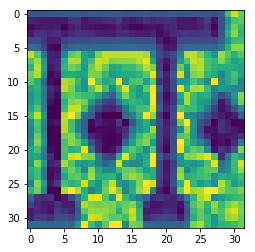

In [324]:
plt.imshow(img_resize) ##sample image visualizing 

In [325]:
#label_to_char_mapping = {0 : 'A' , 1 : 'Aa' , 2 : 'I'}
#print(label_to_char_mapping)
def create_labels_for_11_classes():
    label_list = []
    temp = []
    """for j in range(0,len(char_ab_threshold)):    
        temp = [j for i in range(0,char_big_img[key]) if key in char_ab_threshold]
        label_list = label_list + temp
    """
    label_list = [0 for i in range(1,43)] + [1 for i in range(1,44)]+ [2 for i in range(1,43)] + [3 for i in range(1,46)] + [4 for i in range(1,43)] + [5 for i in range(1,42)] + [6 for i in range(1,46)] + [7 for i in range(1,43)]+ [8 for i in range(1,42)] + [9 for i in range(1,43)] + [10 for i in range(1,44)]
    print(label_list) 
    y_train = np.asarray(label_list)
    y_train = keras.utils.to_categorical(y_train, num_classes)
    print(y_train.shape)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=42)
    print(x_train.shape)
    print(x_val.shape)
    print(y_train.shape)
    print(y_val.shape)

In [326]:
def prepare_labels(num_classes):
    #label_to_char_mapping = {0 : 'A' , 1 : 'Aa' , 2 : 'I'}
    #print(label_to_char_mapping)
    label_list = []
    for j in range(0,num_classes):
        temp = [j for i in range(1,101)]
        label_list = label_list + temp 
    print(label_list)    
    y_train = np.asarray(label_list)
    y_train = keras.utils.to_categorical(y_train, num_classes)
    print(y_train.shape)
    #x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=42)
    return y_train

In [327]:
def split_train_val(x_train,y_train):
    x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.20,random_state=42)
    return x_train,x_val,y_train,y_val

In [328]:
def data_augment_train(x_train,y_train):
    x_train = x_train.astype('float32')
    datagen_train = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,zca_whitening=True)
    #os.makedirs('aug_images')
    datagen_train.fit(x_train)
    for X_batch, y_batch in datagen_train.flow(x_train, y_train, batch_size=9,save_to_dir='aug_images',save_format='jpg'):
        # create a grid of 3x3 images
        for i in range(0, 9):
            plt.subplot(330 + 1 + i)
            plt.imshow(X_batch[i].reshape(32,32),cmap=plt.get_cmap('gray'))
        # show the plot
        plt.show()
        break
    return datagen_train

In [329]:
def data_augment_val(x_val,y_val):
    x_val = x_val.astype('float32')
    datagen_val = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,zca_whitening=True)
    datagen_val.fit(x_val)
    for X_batch,y_batch in datagen_val.flow(x_val,y_val,batch_size=9):
        for i in range(0,9):
            plt.subplot(330 + 1 + i)
            plt.imshow(X_batch[i].reshape(32,32),cmap=plt.get_cmap('gray'))
        plt.show()
        break
    return datagen_val

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

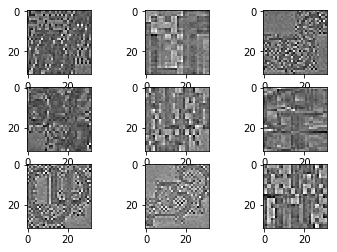

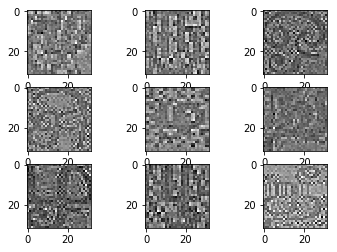

In [330]:
#label_list = [0 for i in range(1,101)] + [1 for i in range(1,101)]+ [2 for i in range(1,101)]
#label_to_char_mapping = {0 : 'A' , 1 : 'Aa' , 2 : 'I'}
#print(label_to_char_mapping)
y_train = prepare_labels(num_classes)
x_train,x_val,y_train,y_val = split_train_val(x_train,y_train)
datagen_train = data_augment_train(x_train,y_train)
datagen_val = data_augment_val(x_val,y_val)

In [336]:
train_generator = datagen_train.flow_from_directory(path,target_size=(32,32),batch_size=32,save_to_dir="aug_images1",save_format='jpg')
char_to_index = train_generator.class_indices
print(char_to_index)

Found 12400 images belonging to 124 classes.
{'A': 0, 'Aa': 1, 'I': 2, 'Ii': 3, 'U': 4, 'Uu': 5, 'ஃ': 6, 'எ': 7, 'ஏ': 8, 'ஐ': 9, 'ஒ': 10, 'ஓ': 11, 'க': 12, 'கி': 13, 'கீ': 14, 'கு': 15, 'கூ': 16, 'க்': 17, 'ங': 18, 'ஙி': 19, 'ஙீ': 20, 'ஙு': 21, 'ஙூ': 22, 'ங்': 23, 'ச': 24, 'சி': 25, 'சீ': 26, 'சு': 27, 'சூ': 28, 'ச்': 29, 'ஞ': 30, 'ஞி': 31, 'ஞீ': 32, 'ஞு': 33, 'ஞூ': 34, 'ஞ்': 35, 'ட': 36, 'டி': 37, 'டீ': 38, 'டு': 39, 'டூ': 40, 'ட்': 41, 'ண': 42, 'ணி': 43, 'ணீ': 44, 'ணு': 45, 'ணூ': 46, 'ண்': 47, 'த': 48, 'தி': 49, 'தீ': 50, 'து': 51, 'தூ': 52, 'த்': 53, 'ந': 54, 'நி': 55, 'நீ': 56, 'நு': 57, 'நூ': 58, 'ந்': 59, 'ன': 60, 'னி': 61, 'னீ': 62, 'னு': 63, 'னூ': 64, 'ன்': 65, 'ப': 66, 'பி': 67, 'பீ': 68, 'பு': 69, 'பூ': 70, 'ப்': 71, 'ம': 72, 'மி': 73, 'மீ': 74, 'மு': 75, 'மூ': 76, 'ம்': 77, 'ய': 78, 'யி': 79, 'யீ': 80, 'யு': 81, 'யூ': 82, 'ய்': 83, 'ர': 84, 'ரி': 85, 'ரீ': 86, 'ரு': 87, 'ரூ': 88, 'ர்': 89, 'ற': 90, 'றி': 91, 'றீ': 92, 'று': 93, 'றூ': 94, 'ற்': 95, 'ல': 96, 'லி': 97, 'லீ': 98

In [314]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(64,(3 , 3) , activation = 'relu'))
    model.add(Conv2D(64,(3 , 3) , activation = 'relu'))
    model.add(Conv2D(64,(3 , 3) , activation = 'relu'))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(124,activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
    print(model.summary())
    checkpointer = ModelCheckpoint(filepath='modelzca2.hdf5',monitor='val_loss',verbose=1, save_best_only=True)
    earlystopping = EarlyStopping(monitor='val_loss',patience=10)
    history = model.fit_generator(datagen_train.flow(x_train, y_train, batch_size=32),
                        steps_per_epoch=x_train.shape[0] // 32,
                        epochs=50,validation_data=datagen_val.flow(x_val,y_val,batch_size=32),callbacks=[checkpointer,earlystopping])
    with open('trainHistoryzca2124.pkl', 'wb') as fp:
        dump(history.history, fp)
    return model
    #model.fit(x_train, y_train,batch_size=32,epochs=100,verbose=1,validation_split=0.2)

In [315]:
model = cnn_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_116 (Conv2D)          (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 8, 8, 64)          36928     
__________

KeyboardInterrupt: 

In [182]:
def load_test_image(model):
    imgA = cv2.imread('./UJTDchar/A/Ta (87).jpg',0)
    img_eqA = exposure.equalize_hist(imgA)
    img_resizeA = cv2.resize(img_eqA, dim, interpolation = cv2.INTER_AREA)
    plt.imshow(img_resizeA)
    x1 = np.array(img_resizeA)
    x1 = np.expand_dims(x1,axis=-1)
    x1 = np.expand_dims(x1,axis=0)
    print(x1.shape)
    prediction = model.predict_on_batch(x1)
    return prediction

(1, 32, 32, 1)
[[  3.26094067e-07   8.79477651e-04   2.47606455e-04   3.27060366e-06
    7.71726221e-08   3.32837262e-05   7.22311199e-01   5.33266648e-05
    3.77459664e-08   7.50840456e-07   2.09209466e-04   5.20814210e-05
    9.63917591e-06   7.94726020e-06   9.64776613e-04   3.95393528e-07
    1.98974547e-07   1.39086769e-05   8.82167284e-10   2.58981657e-07
    2.07184621e-06   7.76791654e-04   1.46868333e-01   1.69665285e-03
    3.31738903e-07   5.34557155e-04   1.92059382e-08   2.50208188e-07
    2.00048235e-05   1.74215984e-05   1.41125955e-02   1.81394171e-05
    1.60781664e-08   1.37630451e-07   5.25642285e-09   8.01494366e-07
    4.15533094e-07   2.08061501e-05   4.77743424e-06   4.22147074e-04
    7.25255633e-09   6.23865577e-04   7.89258614e-09   1.15580906e-05
    1.10154208e-04   4.58328941e-06   5.09224485e-08   4.69649858e-05
    7.52693450e-04   1.95858245e-08   1.52382040e-06   4.30296459e-05
    7.40426040e-05   3.14598509e-07   4.52168933e-07   2.10467988e-04
    4

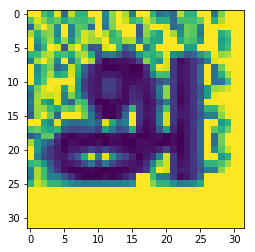

In [183]:
prediction = load_test_image(model)
print(prediction)

In [283]:
def plot_model():
    history = load(open("trainHistoryzca124.pkl", "rb"))
    print(history['acc'])
    print(history.keys())
    # summarize history for accuracy
    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig('model_accuracyzca124.png')
    plt.show()
    # summarize history for loss
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig('model_losszca124.png')
    plt.show()

[0.33770161290322581, 0.69606854838709675, 0.79506048387096773, 0.84112903225806457, 0.87822580645161286, 0.89868951612903225, 0.9199596774193548, 0.92812499999999998, 0.93860887096774193, 0.94425403225806448, 0.95292338709677415, 0.95695564516129028, 0.96572580645161288, 0.96552419354838714, 0.95816532258064513, 0.97046370967741935, 0.96441532258064511, 0.97056451612903227, 0.97620967741935483, 0.97399193548387097, 0.97671370967741933, 0.97278225806451613, 0.9790322580645161, 0.97782258064516125, 0.97883064516129037]
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


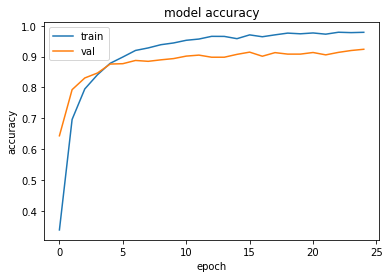

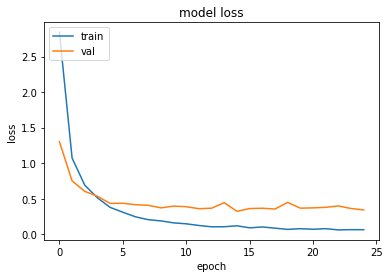

In [284]:
plot_model()